## Data analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from plotly.subplots import make_subplots 
import plotly.graph_objects as go
import cegaltools as cwp
import sklearn.cluster
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('train.csv', sep=';')

data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

## Plot one well log

In [4]:
wells  = data['WELL'].unique()
wells

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [5]:
well34_10_19 = data[data["WELL"]=='15/9-13']
well34_10_19 = well34_10_19.drop(['BS','ROP','DTS','SGR','PEF','DTC','DCAL'],1)


In [6]:
well34_10_19

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,SP,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,24.612379,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,23.895531,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,23.916357,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,23.793688,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,24.104078,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,8.585064,...,19.418915,0.187811,151.198853,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0
18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,8.142556,...,21.444370,0.185574,150.976990,0.002087,0.155774,NaN,NaN,NaN,74000,3.0
18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,7.933336,...,22.646879,0.176074,151.109222,0.007469,0.155774,NaN,NaN,NaN,74000,3.0
18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,7.837981,...,22.253584,0.174617,150.753235,0.010048,0.155774,NaN,NaN,NaN,74000,3.0


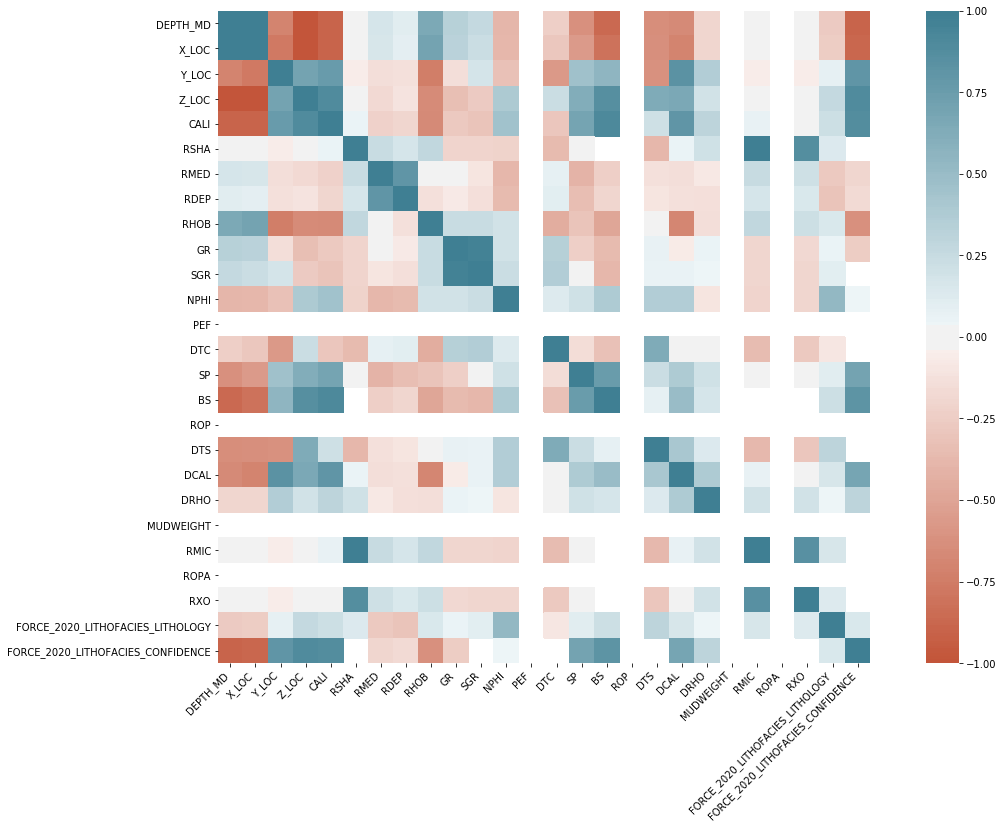

In [7]:
def CorrMatrix(dataset):
    
    corr = dataset.corr()
    x = plt.figure(figsize=(20,12))
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200, ),
    square=True, 
 )
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
 );
    
    

    
CorrMatrix(data[data['WELL']=='35/9-2'])

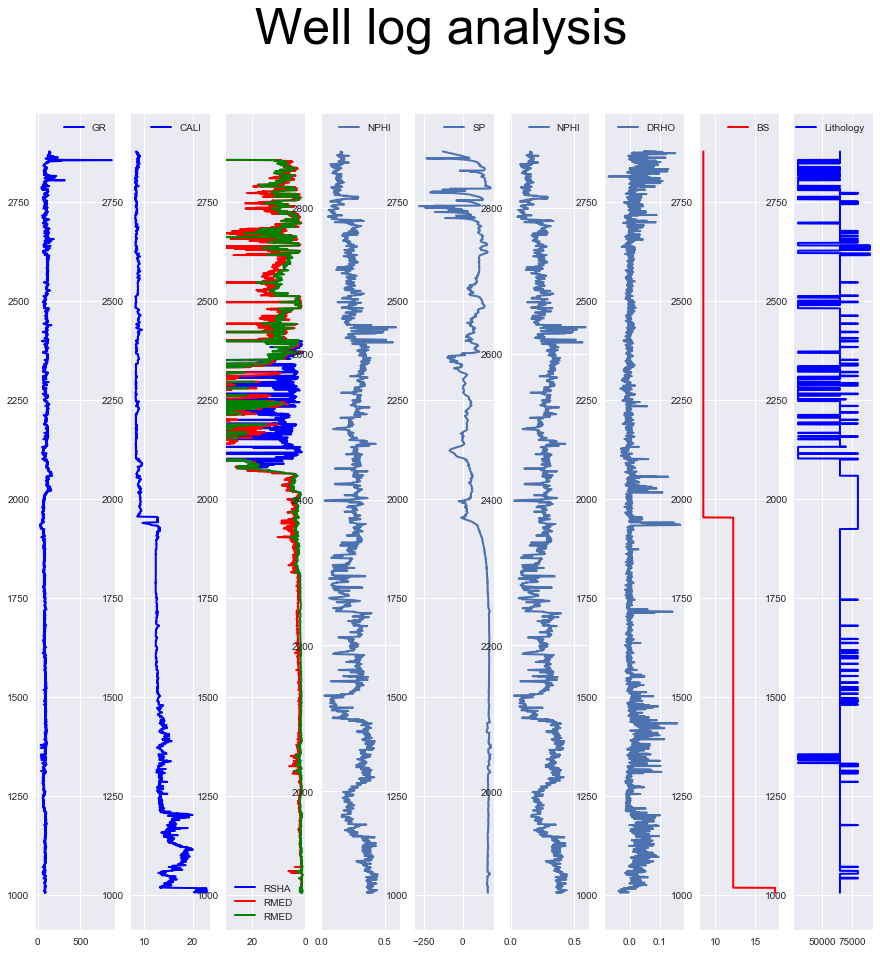

In [8]:
def make_log_plot(data):
    
    plt.style.use('seaborn')
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7,ax8,ax9) = plt.subplots(1,9,figsize=(10, 20))
    fig.suptitle('Well log analysis',color='black',size=50)
    fig.set_figheight(15)
    fig.set_figwidth(15)

    ax1.plot(data['GR'],data['DEPTH_MD'], color="blue", label=r"GR",linewidth=2,linestyle = '-')
    ax1.legend(loc="best")
    
    ax2.plot(data['CALI'],data['DEPTH_MD'], color="blue", label=r"CALI",linewidth=2,linestyle = '-')
    ax2.legend(loc="best")

    ax3.plot(data['RSHA'],data['DEPTH_MD'], color="blue", label=r"RSHA",linewidth=2,linestyle = '-')
    ax3.plot(data['RMED'],data['DEPTH_MD'], color="red", label=r"RMED",linewidth=2,linestyle = '-')
    ax3.plot(data['RDEP'],data['DEPTH_MD'], color="green", label=r"RMED",linewidth=2,linestyle = '-')
    ax3.set_xlim(30,0)
    ax3.legend(loc="best")
    
    ax4.plot(data['NPHI'],data['DEPTH_MD'], label=r"NPHI",linewidth=2,linestyle = '-')
    ax4.legend(loc="best")
    
    ax5.plot(data['SP'],data['DEPTH_MD'], label=r"SP",linewidth=2,linestyle = '-')
    ax5.legend(loc="best")
    
    
    ax6.plot(data['NPHI'],data['DEPTH_MD'], label=r"NPHI",linewidth=2,linestyle = '-')
    ax6.legend(loc="best")
    
    ax7.plot(data['DRHO'],data['DEPTH_MD'], label=r"DRHO",linewidth=2,linestyle = '-')
    ax7.legend(loc="best")
    
    ax8.plot(data['BS'],data['DEPTH_MD'], color="red", label=r"BS",linewidth=2,linestyle = '-')
    ax8.legend(loc="best")

    ax9.plot(data['FORCE_2020_LITHOFACIES_LITHOLOGY'],data['DEPTH_MD'], color="blue", label=r"Lithology",linewidth=2,linestyle = '-')
    ax9.legend(loc="best")
    
    
    
make_log_plot(data[data['WELL']=='35/9-2'])


In [9]:
wells = data['WELL'].unique()
pruned_data = data.drop_duplicates(subset = 'WELL', keep='first')[['WELL', 'X_LOC', 'Y_LOC']].dropna()
wells = pruned_data['WELL'].unique()
pruned_data

nan_data =data.drop_duplicates(subset = 'WELL', keep='first')[['WELL', 'X_LOC', 'Y_LOC', 'Z_LOC']]


In [10]:
pd.set_option("display.max_rows", 101)

## CALI well plots

In [11]:
fig = plt.figure(figsize=(100,50))
fig.set_figwidth(150)
fig.set_figheight(150)
i=1
for well in wells[:6]:
    
    a = data.loc[data['WELL'] == well].CALI
    b = data.loc[data['WELL'] == well].DEPTH_MD
    
    ax =fig.add_subplot(2,3,i)
    ax.plot(a,b)
    i=i+1

## Clusterisation well in to 4 clusters. It will another feature for training. Also imputation of missing X Y coordinates 

In [12]:
coords = np.empty(0)
coords2=[]
for well in wells:
    a = pruned_data.loc[pruned_data['WELL'] == well].X_LOC.item()
    b = pruned_data.loc[pruned_data['WELL'] == well].Y_LOC.item()
    c = np.array([a,b])
    coords2.append([a,b])
    coords = np.append(coords, c)
print(coords.shape)
print(coords2)
print(np.array(coords2).shape)
coords = np.array(coords2)
coords


(182,)
[[437641.96875, 6470972.5], [436817.90625, 6462991.5], [438591.96875, 6478951.5], [455221.34375, 6533321.5], [459499.6875, 6539423.0], [444152.125, 6435549.0], [443276.78125, 6444984.5], [460417.0, 6453752.5], [448701.6875, 6429298.5], [474566.5, 6436486.0], [475279.15625, 6518414.0], [476768.09375, 6523590.0], [477772.78125, 6520634.0], [449950.6875, 6500259.0], [474410.78125, 6510408.5], [442820.6875, 6461117.5], [446273.84375, 6468387.5], [466862.1875, 6479873.0], [520153.1875, 6452287.5], [470523.375, 6560848.5], [465848.8125, 6564135.5], [463756.0, 6562935.0], [469334.625, 6628720.0], [476936.15625, 6625441.5], [479890.5625, 6641111.5], [487292.09375, 6643944.0], [454469.53125, 6603730.0], [475844.90625, 6621548.0], [488713.125, 6598750.0], [489824.125, 6602677.5], [495697.25, 6618248.0], [454810.25, 6571041.0], [463972.28125, 6591330.0], [483550.6875, 6590310.0], [501149.5625, 6608191.5], [444585.59375, 6711937.5], [497360.46875, 6737311.5], [496651.78125, 6739799.5], [497

array([[ 437641.96875, 6470972.5    ],
       [ 436817.90625, 6462991.5    ],
       [ 438591.96875, 6478951.5    ],
       [ 455221.34375, 6533321.5    ],
       [ 459499.6875 , 6539423.     ],
       [ 444152.125  , 6435549.     ],
       [ 443276.78125, 6444984.5    ],
       [ 460417.     , 6453752.5    ],
       [ 448701.6875 , 6429298.5    ],
       [ 474566.5    , 6436486.     ],
       [ 475279.15625, 6518414.     ],
       [ 476768.09375, 6523590.     ],
       [ 477772.78125, 6520634.     ],
       [ 449950.6875 , 6500259.     ],
       [ 474410.78125, 6510408.5    ],
       [ 442820.6875 , 6461117.5    ],
       [ 446273.84375, 6468387.5    ],
       [ 466862.1875 , 6479873.     ],
       [ 520153.1875 , 6452287.5    ],
       [ 470523.375  , 6560848.5    ],
       [ 465848.8125 , 6564135.5    ],
       [ 463756.     , 6562935.     ],
       [ 469334.625  , 6628720.     ],
       [ 476936.15625, 6625441.5    ],
       [ 479890.5625 , 6641111.5    ],
       [ 487292.09375, 66

344844738734.078
203180442967.78857
122654105069.16895
94145657254.88202
69571484295.31766
58429365838.998985
50443303497.13668
44871179295.41201


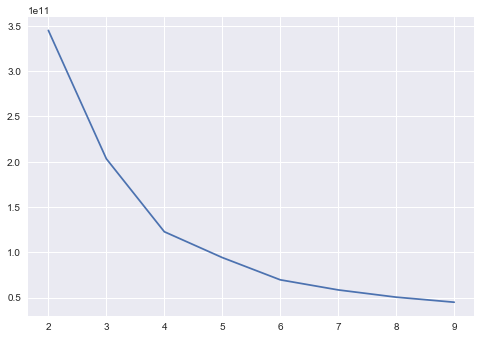

In [13]:
inert = []
for n in range(2,10):
    kmcluster = sklearn.cluster.KMeans(n_clusters=n).fit(coords)
    inert.append(kmcluster.inertia_)
    print(kmcluster.inertia_)
plt.plot(np.arange(2,10,1), np.array(inert))

In [14]:
inert = np.array(inert)
abs(np.diff(np.diff(inert)))

array([6.11379579e+10, 5.20178901e+10, 3.93427485e+09, 1.34320545e+10,
       3.15605611e+09, 2.41393814e+09])

In [15]:
sklearn.cluster.KMeans(n_clusters=4).fit(coords).labels_
np.c_[coords, sklearn.cluster.KMeans(n_clusters=4).fit(coords).labels_]

array([[4.37641969e+05, 6.47097250e+06, 2.00000000e+00],
       [4.36817906e+05, 6.46299150e+06, 2.00000000e+00],
       [4.38591969e+05, 6.47895150e+06, 2.00000000e+00],
       [4.55221344e+05, 6.53332150e+06, 2.00000000e+00],
       [4.59499688e+05, 6.53942300e+06, 2.00000000e+00],
       [4.44152125e+05, 6.43554900e+06, 2.00000000e+00],
       [4.43276781e+05, 6.44498450e+06, 2.00000000e+00],
       [4.60417000e+05, 6.45375250e+06, 2.00000000e+00],
       [4.48701688e+05, 6.42929850e+06, 2.00000000e+00],
       [4.74566500e+05, 6.43648600e+06, 2.00000000e+00],
       [4.75279156e+05, 6.51841400e+06, 2.00000000e+00],
       [4.76768094e+05, 6.52359000e+06, 2.00000000e+00],
       [4.77772781e+05, 6.52063400e+06, 2.00000000e+00],
       [4.49950688e+05, 6.50025900e+06, 2.00000000e+00],
       [4.74410781e+05, 6.51040850e+06, 2.00000000e+00],
       [4.42820688e+05, 6.46111750e+06, 2.00000000e+00],
       [4.46273844e+05, 6.46838750e+06, 2.00000000e+00],
       [4.66862188e+05, 6.47987

In [16]:
out = pd.DataFrame(np.c_[coords, sklearn.cluster.KMeans(n_clusters=4).fit(coords).labels_], columns = ['X','Y','cluster'])

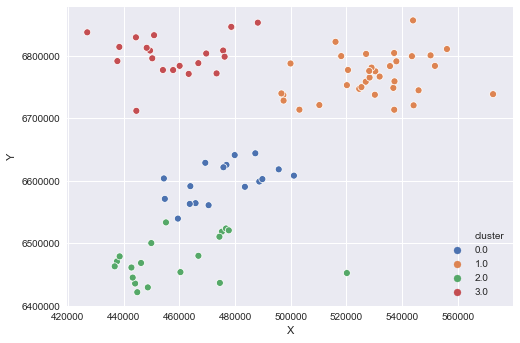

In [17]:
sns.scatterplot(data=out, x="X", y="Y", hue="cluster", palette="deep")

In [18]:
nullwells = data.drop_duplicates(subset = 'WELL', keep='first')[['WELL', 'X_LOC', 'Y_LOC']][data.drop_duplicates(subset = 'WELL', keep='first')[['WELL', 'X_LOC', 'Y_LOC']]['X_LOC'].isnull()]
wcls = [well[:well.find('/')] for well in nullwells['WELL']]
nullwells['WCLS'] = wcls
nullwells

,WELL,X_LOC,Y_LOC,WCLS
350839,25/5-4,NaN,NaN,25
423430,25/8-7,NaN,NaN,25
599851,31/3-1,NaN,NaN,31
662869,31/5-4 S,NaN,NaN,31
848315,34/2-4,NaN,NaN,34
1021269,35/11-6,NaN,NaN,35
1152230,7/1-1,NaN,NaN,7


In [19]:
wcls = [well[:well.find('/')] for well in pruned_data['WELL']]
pruned_data['WCLS'] = wcls
for well in nullwells['WELL']:
    cwell = nullwells[nullwells['WELL']==well]
    if cwell['WCLS'].item() in list(pruned_data['WCLS']):
        pdsx = pd.Series(pruned_data[pruned_data['WCLS']==cwell['WCLS'].item()]['X_LOC'])
        pdsy = pd.Series(pruned_data[pruned_data['WCLS']==cwell['WCLS'].item()]['Y_LOC'])
        cwell['X_LOC'] = pdsx.mean(axis=0)
        cwell['Y_LOC'] = pdsy.mean(axis=0)
        print(cwell)
    nullwells[nullwells['WELL']==well] = cwell

nullwells

          WELL          X_LOC         Y_LOC WCLS
350839  25/5-4  474697.585417  6.601651e+06   25
          WELL          X_LOC         Y_LOC WCLS
423430  25/8-7  474697.585417  6.601651e+06   25
          WELL       X_LOC      Y_LOC WCLS
599851  31/3-1  528491.875  6739011.0   31
            WELL       X_LOC      Y_LOC WCLS
662869  31/5-4 S  528491.875  6739011.0   31
          WELL          X_LOC         Y_LOC WCLS
848315  34/2-4  467173.117647  6.803734e+06   34
            WELL          X_LOC         Y_LOC WCLS
1021269  35/11-6  533103.287109  6.792895e+06   35
          WELL         X_LOC      Y_LOC WCLS
1152230  7/1-1  444920.28125  6421580.5    7


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,WELL,X_LOC,Y_LOC,WCLS
350839,25/5-4,474697.585417,6.601651e+06,25
423430,25/8-7,474697.585417,6.601651e+06,25
599851,31/3-1,528491.875000,6.739011e+06,31
662869,31/5-4 S,528491.875000,6.739011e+06,31
848315,34/2-4,467173.117647,6.803734e+06,34
1021269,35/11-6,533103.287109,6.792895e+06,35
1152230,7/1-1,444920.281250,6.421580e+06,7


In [20]:
pruned_data1 = pruned_data.copy()
pruned_data1

,WELL,X_LOC,Y_LOC,WCLS
0,15/9-13,437641.96875,6470972.5,15
18270,15/9-15,436817.90625,6462991.5,15
35987,15/9-17,438591.96875,6478951.5,15
53337,16/1-2,455221.34375,6533321.5,16
55071,16/1-6 A,459499.68750,6539423.0,16
58694,16/10-1,444152.12500,6435549.0,16
76369,16/10-2,443276.78125,6444984.5,16
78806,16/10-3,460417.00000,6453752.5,16
94762,16/10-5,448701.68750,6429298.5,16
97527,16/11-1 ST3,474566.50000,6436486.0,16


In [21]:
pruned_data1.reset_index(drop=True, inplace=True)
pruned_data1

,WELL,X_LOC,Y_LOC,WCLS
0,15/9-13,437641.96875,6470972.5,15
1,15/9-15,436817.90625,6462991.5,15
2,15/9-17,438591.96875,6478951.5,15
3,16/1-2,455221.34375,6533321.5,16
4,16/1-6 A,459499.68750,6539423.0,16
5,16/10-1,444152.12500,6435549.0,16
6,16/10-2,443276.78125,6444984.5,16
7,16/10-3,460417.00000,6453752.5,16
8,16/10-5,448701.68750,6429298.5,16
9,16/11-1 ST3,474566.50000,6436486.0,16


In [22]:
pruned_data1['CLUSTER'] = out['cluster']
pruned_data1

,WELL,X_LOC,Y_LOC,WCLS,CLUSTER
0,15/9-13,437641.96875,6470972.5,15,2.0
1,15/9-15,436817.90625,6462991.5,15,2.0
2,15/9-17,438591.96875,6478951.5,15,2.0
3,16/1-2,455221.34375,6533321.5,16,2.0
4,16/1-6 A,459499.68750,6539423.0,16,0.0
5,16/10-1,444152.12500,6435549.0,16,2.0
6,16/10-2,443276.78125,6444984.5,16,2.0
7,16/10-3,460417.00000,6453752.5,16,2.0
8,16/10-5,448701.68750,6429298.5,16,2.0
9,16/11-1 ST3,474566.50000,6436486.0,16,2.0


##  Imputation of missing data

In [23]:
kmcluster = sklearn.cluster.KMeans(n_clusters=4).fit(coords)

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def numeric_preproccessing(data):
    num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    (('scaler', StandardScaler()))
        ])
    data['CALI_fitted'] = num_pipeline.fit_transform(data['CALI'].values.reshape(-1, 1))
    data['RMED_fitted'] = num_pipeline.fit_transform(data['RMED'].values.reshape(-1, 1))
    data['RDEP_fitted'] = num_pipeline.fit_transform(data['RDEP'].values.reshape(-1, 1))   
    data['GR_fitted']   = num_pipeline.fit_transform(data['GR'].values.reshape(-1, 1))
    data['depth_fitted']   = num_pipeline.fit_transform(data['DEPTH_MD'].values.reshape(-1, 1))
    data['DTC_fitted'] =num_pipeline.fit_transform(data['DTC'].values.reshape(-1, 1))
    data['ROP_fitted'] = num_pipeline.fit_transform(data['ROP'].values.reshape(-1, 1))
    data['RHOB_fitted'] = num_pipeline.fit_transform(data['RHOB'].values.reshape(-1, 1))
    data['FORCE_2020_LITHOFACIES_CONFIDENCE'] =data['FORCE_2020_LITHOFACIES_CONFIDENCE'].fillna(3)
    data['SP_fitted'] = num_pipeline.fit_transform(data['SP'].values.reshape(-1, 1))
    data['DRHO_fitted'] = num_pipeline.fit_transform(data['DRHO'].values.reshape(-1, 1))
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imput = imputer.fit(data[['X_LOC', 'Y_LOC']])
    data[['X_LOC', 'Y_LOC']]=imput.transform(data[['X_LOC', 'Y_LOC']])
    
    
    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
        
def test_transform(test):
    num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    (('scaler', StandardScaler()))
        ])
    
    test['CALI_fitted'] = num_pipeline.fit_transform(test['CALI'].values.reshape(-1, 1))
    test['RMED_fitted'] = num_pipeline.fit_transform(test['RMED'].values.reshape(-1, 1))
    test['RDEP_fitted'] = num_pipeline.fit_transform(test['RDEP'].values.reshape(-1, 1))   
    test['GR_fitted']   = num_pipeline.fit_transform(test['GR'].values.reshape(-1, 1))
    test['depth_fitted']   = num_pipeline.fit_transform(test['DEPTH_MD'].values.reshape(-1, 1))
    test['DTC_fitted'] =num_pipeline.fit_transform(test['DTC'].values.reshape(-1, 1))
    test['ROP_fitted'] = num_pipeline.fit_transform(test['ROP'].values.reshape(-1, 1))
    test['RHOB_fitted'] = num_pipeline.fit_transform(test['RHOB'].values.reshape(-1, 1))
    test['SP_fitted'] = num_pipeline.fit_transform(test['SP'].values.reshape(-1, 1))
    test['DRHO_fitted'] = num_pipeline.fit_transform(test['DRHO'].values.reshape(-1, 1))
    test['CLUSTERS']= Clusterisation(test)
    X = test[['CALI_fitted', 'RMED_fitted','RDEP_fitted','GR_fitted','depth_fitted','DTC_fitted','ROP_fitted','RHOB_fitted','SP_fitted','DRHO_fitted','CLUSTERS']]
    return X
    
    
def Clusterisation(data):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imput = imputer.fit(data[['X_LOC', 'Y_LOC']])
    data[['X_LOC', 'Y_LOC']]=imput.transform(data[['X_LOC', 'Y_LOC']])
    X = data['CLUSTERS'] = kmcluster.predict(data[['X_LOC','Y_LOC']])
    return X
   
    


In [25]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imput = imputer.fit(data[['X_LOC', 'Y_LOC']])
data[['X_LOC', 'Y_LOC']]=imput.transform(data[['X_LOC', 'Y_LOC']])
Clusterisation(data)


array([1, 1, 1, ..., 2, 2, 2])

## Encoding categorial features

## Prepare a model to classify not a shale

In [26]:
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']

lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}
y = y.map(lithology_numbers)

In [27]:
# for s in data['FORCE_2020_LITHOFACIES_LITHOLOGY']:
#    if s != '65000':
#       data['Not_Shale']= 1
 #   else: data['Not_Shale'] = 0
        

#data

In [28]:
numeric_preproccessing(data)

In [29]:
X = data[['CALI_fitted', 'RMED_fitted','RDEP_fitted','GR_fitted','depth_fitted','DTC_fitted','ROP_fitted','RHOB_fitted','FORCE_2020_LITHOFACIES_CONFIDENCE','SP_fitted','DRHO_fitted','CLUSTERS']]

In [30]:
A = np.load('penalty_matrix.npy')
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
clf =XGBClassifier()
param_grid = {'learning_rate': [0.1],
              'n_estimators': np.arange(10,210,40),
              'subsample': np.arange(0.05,1.05,.4),
              'max_depth': np.arange(2,10,2),
              
               'objective': ['multi:softmax']
        }
pizda = GridSearchCV(estimator=clf, param_grid=param_grid, scoring ='accuracy', cv=4,verbose=10, n_jobs=-1)
pizda.fit(X,y)



Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 48.4min


In [ ]:


print(pizda.best_estimator_)

print(pizda.best_score_)
print(pizda.best_params_)


In [ ]:
open_test_features = pd.read_csv('test.csv', sep=';')


open_test_features.head()

In [ ]:
 L = test_transform(open_test_features)

In [ ]:


test_prediction = pizda.predict(L)